In [680]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [681]:
df = pd.read_csv('thyroid0387-attr-clean.csv')

In [682]:
with pd.option_context('display.max_columns', 40):
    print(df.describe(include='all'))

                 age   sex on thyroxine query on thyroxine  \
count    9172.000000  9172         9172               9172   
unique           NaN     3            2                  2   
top              NaN     F            f                  f   
freq             NaN  6073         7932               9019   
mean       73.555822   NaN          NaN                NaN   
std      1183.976718   NaN          NaN                NaN   
min         1.000000   NaN          NaN                NaN   
25%        37.000000   NaN          NaN                NaN   
50%        55.000000   NaN          NaN                NaN   
75%        68.000000   NaN          NaN                NaN   
max     65526.000000   NaN          NaN                NaN   

       on antithyroid medication  sick pregnant thyroid surgery  \
count                       9172  9172     9172            9172   
unique                         2     2        2               2   
top                            f     f        f       

In [683]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   object
 2   on thyroxine               9172 non-null   object
 3   query on thyroxine         9172 non-null   object
 4   on antithyroid medication  9172 non-null   object
 5   sick                       9172 non-null   object
 6   pregnant                   9172 non-null   object
 7   thyroid surgery            9172 non-null   object
 8   I131 treatment             9172 non-null   object
 9   query hypothyroid          9172 non-null   object
 10  query hyperthyroid         9172 non-null   object
 11  lithium                    9172 non-null   object
 12  goitre                     9172 non-null   object
 13  tumor                      9172 non-null   object
 14  hypopitu

In [684]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(df[i].value_counts())
    print('************************************')

sex
F    6073
M    2792
?     307
Name: count, dtype: int64
************************************
on thyroxine
f    7932
t    1240
Name: count, dtype: int64
************************************
query on thyroxine
f    9019
t     153
Name: count, dtype: int64
************************************
on antithyroid medication
f    9056
t     116
Name: count, dtype: int64
************************************
sick
f    8828
t     344
Name: count, dtype: int64
************************************
pregnant
f    9065
t     107
Name: count, dtype: int64
************************************
thyroid surgery
f    9038
t     134
Name: count, dtype: int64
************************************
I131 treatment
f    9003
t     169
Name: count, dtype: int64
************************************
query hypothyroid
f    8542
t     630
Name: count, dtype: int64
************************************
query hyperthyroid
f    8521
t     651
Name: count, dtype: int64
************************************
lithium
f    907

In [685]:
df=df.replace({"t": 1, "f": 0})

In [686]:
df=df.replace({'?': np.nan})

In [687]:
df=df.replace({"M": 1, "F": 0})

In [688]:
# not relavent for medical diagnosis
del df['referral source']

In [689]:
# not relevant if measured
del df['TSH measured']

In [690]:
del df['T3 measured']

In [691]:
del df['TT4 measured']

In [692]:
del df['T4U measured']

In [693]:
del df['FTI measured']

In [694]:
del df['TBG measured']

In [695]:
# too many missing values
del df['TBG']

In [696]:
# remove all rows with missing values
df = df.dropna()

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5789 entries, 19 to 9141
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        5789 non-null   int64  
 1   sex                        5789 non-null   float64
 2   on thyroxine               5789 non-null   int64  
 3   query on thyroxine         5789 non-null   int64  
 4   on antithyroid medication  5789 non-null   int64  
 5   sick                       5789 non-null   int64  
 6   pregnant                   5789 non-null   int64  
 7   thyroid surgery            5789 non-null   int64  
 8   I131 treatment             5789 non-null   int64  
 9   query hypothyroid          5789 non-null   int64  
 10  query hyperthyroid         5789 non-null   int64  
 11  lithium                    5789 non-null   int64  
 12  goitre                     5789 non-null   int64  
 13  tumor                      5789 non-null   int64  
 

In [698]:
with pd.option_context('display.max_columns', 40):
    print(df.describe(include='all'))

                 age          sex  on thyroxine  query on thyroxine  \
count    5789.000000  5789.000000   5789.000000         5789.000000   
unique           NaN          NaN           NaN                 NaN   
top              NaN          NaN           NaN                 NaN   
freq             NaN          NaN           NaN                 NaN   
mean       76.291242     0.333391      0.121264            0.010364   
std      1216.726999     0.471466      0.326463            0.101286   
min         1.000000     0.000000      0.000000            0.000000   
25%        38.000000     0.000000      0.000000            0.000000   
50%        56.000000     0.000000      0.000000            0.000000   
75%        69.000000     1.000000      0.000000            0.000000   
max     65512.000000     1.000000      1.000000            1.000000   

        on antithyroid medication         sick     pregnant  thyroid surgery  \
count                 5789.000000  5789.000000  5789.000000      57

In [699]:
# hyperthyroid conditions:
# 	A	hyperthyroid
# 	B	T3 toxic
# 	C	toxic goitre
# 	D	secondary toxic

# hypothyroid conditions:
# 	E	hypothyroid
# 	F	primary hypothyroid
# 	G	compensated hypothyroid
# 	H	secondary hypothyroid

hyper_cond = ['A', 'B', 'C', 'D']
hypo_cond = ['E', 'F', 'G', 'H']
healthy_cond = ['-']

for idx, row in df.iterrows():
    cond = row['diagnosis']
    if cond in hyper_cond:
       df.loc[idx, 'diagnosis'] = 2
    elif cond in hypo_cond:
        df.loc[idx, 'diagnosis'] = 1
    elif cond in healthy_cond:
        df.loc[idx, 'diagnosis'] = 0
    else:
        df = df.drop(idx)

In [700]:
for i in df.columns:
    print(df[i].value_counts())
    print('************************************')

age
70       106
60       103
55       101
72       100
59        98
        ... 
455        1
94         1
65511      1
65512      1
2          1
Name: count, Length: 93, dtype: int64
************************************
sex
0.0    2932
1.0    1563
Name: count, dtype: int64
************************************
on thyroxine
0    4033
1     462
Name: count, dtype: int64
************************************
query on thyroxine
0    4452
1      43
Name: count, dtype: int64
************************************
on antithyroid medication
0    4421
1      74
Name: count, dtype: int64
************************************
sick
0    4319
1     176
Name: count, dtype: int64
************************************
pregnant
0    4472
1      23
Name: count, dtype: int64
************************************
thyroid surgery
0    4433
1      62
Name: count, dtype: int64
************************************
I131 treatment
0    4406
1      89
Name: count, dtype: int64
************************************
que

In [701]:
df.count()

age                          4495
sex                          4495
on thyroxine                 4495
query on thyroxine           4495
on antithyroid medication    4495
sick                         4495
pregnant                     4495
thyroid surgery              4495
I131 treatment               4495
query hypothyroid            4495
query hyperthyroid           4495
lithium                      4495
goitre                       4495
tumor                        4495
hypopituitary                4495
psych                        4495
TSH                          4495
T3                           4495
TT4                          4495
T4U                          4495
FTI                          4495
diagnosis                    4495
dtype: int64

In [702]:
df.duplicated().any()

True

In [703]:
df.drop_duplicates(inplace=True)

In [704]:
df.count()

age                          4493
sex                          4493
on thyroxine                 4493
query on thyroxine           4493
on antithyroid medication    4493
sick                         4493
pregnant                     4493
thyroid surgery              4493
I131 treatment               4493
query hypothyroid            4493
query hyperthyroid           4493
lithium                      4493
goitre                       4493
tumor                        4493
hypopituitary                4493
psych                        4493
TSH                          4493
T3                           4493
TT4                          4493
T4U                          4493
FTI                          4493
diagnosis                    4493
dtype: int64

In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4493 entries, 19 to 9141
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4493 non-null   int64  
 1   sex                        4493 non-null   float64
 2   on thyroxine               4493 non-null   int64  
 3   query on thyroxine         4493 non-null   int64  
 4   on antithyroid medication  4493 non-null   int64  
 5   sick                       4493 non-null   int64  
 6   pregnant                   4493 non-null   int64  
 7   thyroid surgery            4493 non-null   int64  
 8   I131 treatment             4493 non-null   int64  
 9   query hypothyroid          4493 non-null   int64  
 10  query hyperthyroid         4493 non-null   int64  
 11  lithium                    4493 non-null   int64  
 12  goitre                     4493 non-null   int64  
 13  tumor                      4493 non-null   int64  
 

In [706]:
for i in df.columns:
    print(df[i].value_counts())
    print('************************************')

age
70       106
60       102
55       101
72       100
59        98
        ... 
455        1
94         1
65511      1
65512      1
2          1
Name: count, Length: 93, dtype: int64
************************************
sex
0.0    2930
1.0    1563
Name: count, dtype: int64
************************************
on thyroxine
0    4032
1     461
Name: count, dtype: int64
************************************
query on thyroxine
0    4450
1      43
Name: count, dtype: int64
************************************
on antithyroid medication
0    4419
1      74
Name: count, dtype: int64
************************************
sick
0    4317
1     176
Name: count, dtype: int64
************************************
pregnant
0    4470
1      23
Name: count, dtype: int64
************************************
thyroid surgery
0    4431
1      62
Name: count, dtype: int64
************************************
I131 treatment
0    4404
1      89
Name: count, dtype: int64
************************************
que

In [707]:
# only negative values does not add any information
del df['hypopituitary']

In [708]:
df['TSH'] = pd.to_numeric(df['TSH'])
df['T3'] = pd.to_numeric(df['T3'])
df['TT4'] = pd.to_numeric(df['TT4'])
df['T4U'] = pd.to_numeric(df['T4U'])
df['FTI'] = pd.to_numeric(df['FTI'])
df['diagnosis'] = pd.to_numeric(df['diagnosis'])

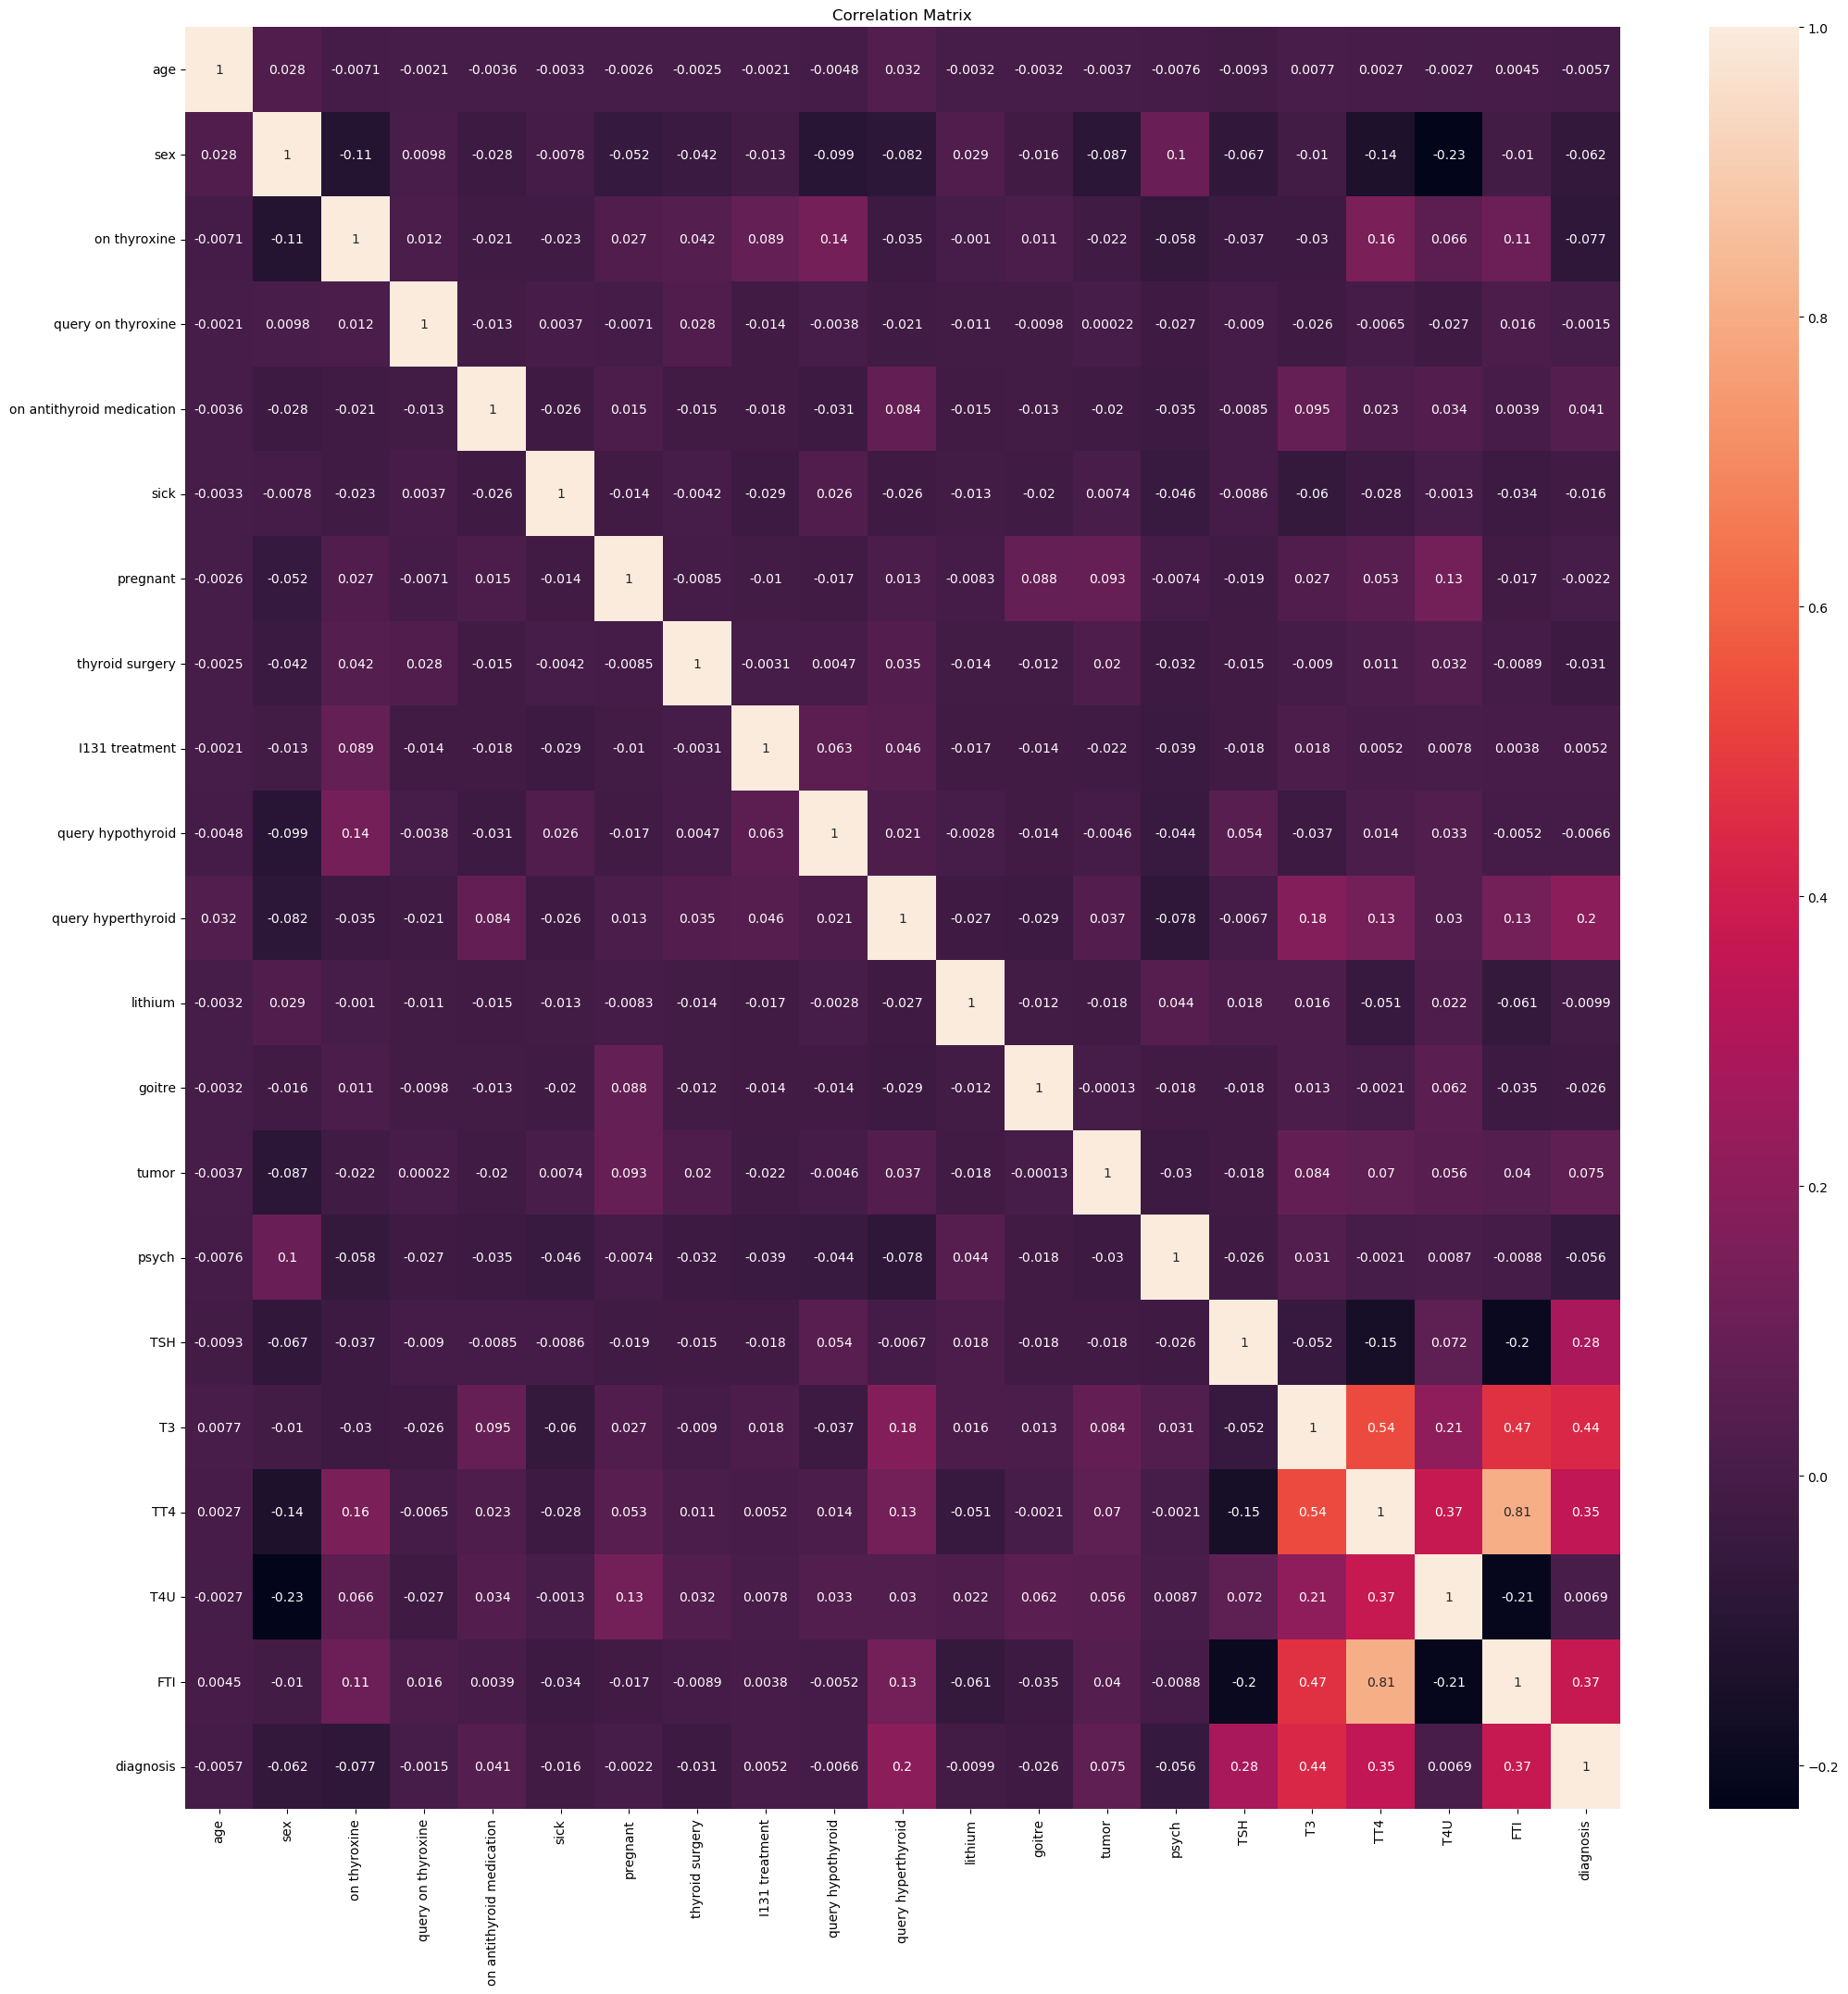

In [709]:
correlation_df = df.loc[:, df.columns].corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_df, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [710]:
col_to_remove = []
for idx, col in df.iterrows():
    val = col['age']
    if  val < 1 or val > 120:
        col_to_remove.append(idx)
print(col_to_remove)
df.drop(col_to_remove, inplace=True)

[2976, 5710, 6392]


In [711]:
df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].describe()

,age,TSH,T3,TT4,T4U,FTI
count,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000
mean,53.102004,2.128017,2.036846,107.969265,0.973186,112.144655
std,18.395916,4.136879,0.761738,30.460386,0.160434,31.584524
min,1.000000,0.005000,0.100000,4.000000,0.250000,3.500000
25%,38.000000,0.420000,1.600000,90.000000,0.870000,95.000000
50%,56.000000,1.300000,2.000000,104.000000,0.970000,108.000000
75%,68.000000,2.300000,2.300000,122.000000,1.060000,125.000000
max,97.000000,98.000000,18.000000,430.000000,2.120000,642.000000


In [714]:
with pd.option_context('display.max_columns', 40):
    df.describe(include='all')

(array([  6.,   1.,   0.,   0.,   0.,   4.,   2.,   1.,   1.,   3.,   6.,
          9.,  17.,  17.,  14.,  51.,  33.,  29.,  39.,  44.,  97.,  49.,
         60.,  83.,  55.,  86.,  57.,  57.,  74.,  59., 129.,  69.,  70.,
         53.,  66., 120.,  45.,  65.,  63.,  68., 120.,  49.,  63.,  64.,
         72., 169.,  88.,  90.,  97.,  98., 191.,  97.,  81.,  69.,  87.,
        170.,  81.,  76., 106.,  80., 196.,  86.,  84.,  76.,  62., 110.,
         39.,  31.,  26.,  33.,  41.,   9.,  14.,   8.,   7.,  11.,   3.,
          0.,   1.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ,  13.2,  14.4,  15.6,  16.8,  18. ,  19.2,  20.4,
         21.6,  22.8,  24. ,  25.2,  26.4,  27.6,  28.8,  30. ,  31.2,
         32.4,  33.6,  34.8,  36. ,  37.2,  38.4,  39.6,  40.8,  42. ,
         43.2,  44.4,  45.6,  46.8

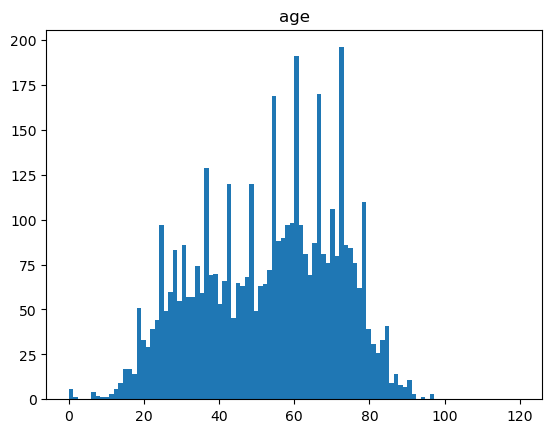

In [715]:
plt.title('age')
plt.hist(df['age'], bins=100, range=(0, 120), align='mid')

(array([1.837e+03, 1.209e+03, 6.460e+02, 2.980e+02, 1.520e+02, 9.700e+01,
        5.100e+01, 3.400e+01, 2.800e+01, 2.100e+01, 8.000e+00, 1.600e+01,
        1.600e+01, 8.000e+00, 6.000e+00, 8.000e+00, 4.000e+00, 6.000e+00,
        5.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 3.000e+00, 5.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

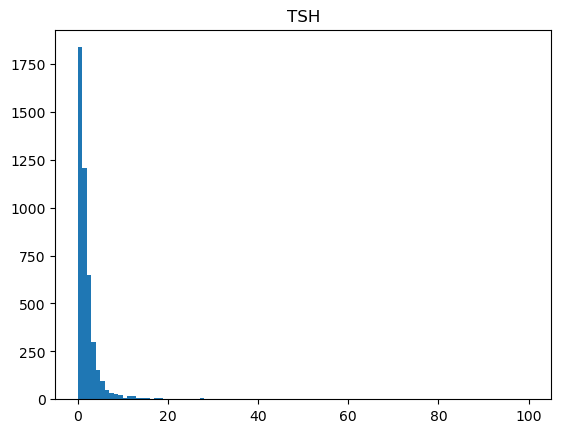

In [716]:
plt.title('TSH')
plt.hist(df['TSH'], bins=100, range=(0, 100), align='mid')

(array([  3.,   8.,   9.,  19.,  12.,  40., 187., 401., 539., 305., 686.,
        662., 574., 439., 134., 183.,  93.,  45.,  26.,   6.,  13.,  18.,
         14.,  14.,   6.,   9.,   2.,   6.,   4.,   4.,   4.,   1.,   1.,
          1.,   3.,   2.,   3.,   1.,   0.,   2.,   1.,   0.,   4.,   0.,
          0.,   0.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.18,  0.36,  0.54,  0.72,  0.9 ,  1.08,  1.26,  1.44,
         1.62,  1.8 ,  1.98,  2.16,  2.34,  2.52,  2.7 ,  2.88,  3.06,
         3.24,  3.42,  3.6 ,  3.78,  3.96,  4.14,  4.32,  4.5 ,  4.68,
         4.86,  5.04,  5.22,  5.4 ,  5.58,  5.76,  5.94,  6.12,  6.3 ,
         6.48,  6.66,  6.84,  7.02

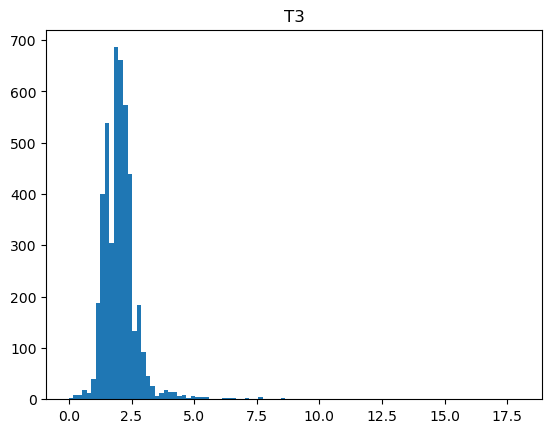

In [717]:
plt.title('T3')
plt.hist(df['T3'], bins=100, range=(0, 18), align='mid')

(array([  1.,   0.,   1.,   0.,   0.,   0.,   2.,   2.,   2.,   4.,   8.,
         11.,  18.,  54.,  86.,  92., 150., 165., 263., 244., 392., 312.,
        403., 302., 334., 233., 285., 183., 181., 156., 151.,  86.,  85.,
         57.,  44.,  29.,  21.,   9.,  11.,   9.,  15.,   5.,   9.,   2.,
          9.,   3.,   5.,   2.,   8.,   4.,   1.,   3.,   5.,   6.,   4.,
          3.,   4.,   1.,   1.,   2.,   2.,   2.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.]),
 array([  0. ,   4.5,   9. ,  13.5,  18. ,  22.5,  27. ,  31.5,  36. ,
         40.5,  45. ,  49.5,  54. ,  58.5,  63. ,  67.5,  72. ,  76.5,
         81. ,  85.5,  90. ,  94.5,  99. , 103.5, 108. , 112.5, 117. ,
        121.5, 126. , 130.5, 135. , 139.5, 144. , 148.5, 153. , 157.5,
        162. , 166.5, 171. , 175.5

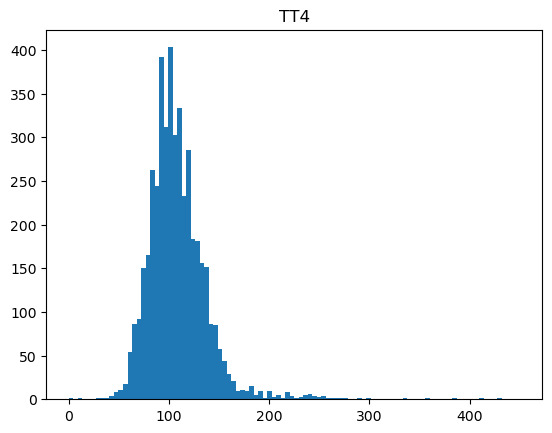

In [718]:
plt.title('TT4')
plt.hist(df['TT4'], bins=100, range=(0, 450), align='mid')

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   5.,   1.,
          5.,   9.,  15.,  22.,  38.,  53.,  50.,  64., 127., 107., 199.,
        239., 201., 222., 360., 377., 262., 255., 380., 213., 281., 154.,
        212., 174.,  86., 102.,  30.,  43.,  40.,  24.,  26.,  11.,  13.,
         15.,   8.,  13.,   3.,   7.,   7.,   3.,   5.,   1.,   1.,   3.,
          4.,   7.,   1.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975

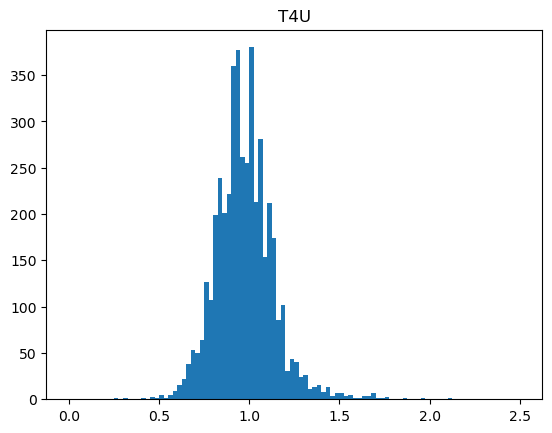

In [719]:
plt.title('T4U')
plt.hist(df['T4U'], bins=100, range=(0, 2.5),  align='mid')

(array([  1.,   1.,   0.,   0.,   2.,   2.,   4.,   6.,  18.,  54., 140.,
        152., 267., 392., 553., 491., 497., 492., 349., 310., 223., 180.,
        123.,  73.,  20.,  24.,  17.,   4.,   9.,   8.,   8.,   6.,   5.,
          9.,   2.,   3.,   8.,   2.,   6.,   5.,   6.,   1.,   1.,   0.,
          2.,   1.,   0.,   1.,   0.,   2.,   1.,   1.,   0.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.]),
 array([  3.  ,   9.47,  15.94,  22.41,  28.88,  35.35,  41.82,  48.29,
         54.76,  61.23,  67.7 ,  74.17,  80.64,  87.11,  93.58, 100.05,
        106.52, 112.99, 119.46, 125.93, 132.4 , 138.87, 145.34, 151.81,
        158.28, 164.75, 171.22, 177.69, 184.16, 190.63, 197.1 , 203.57,
        210.04, 216.51, 222.98

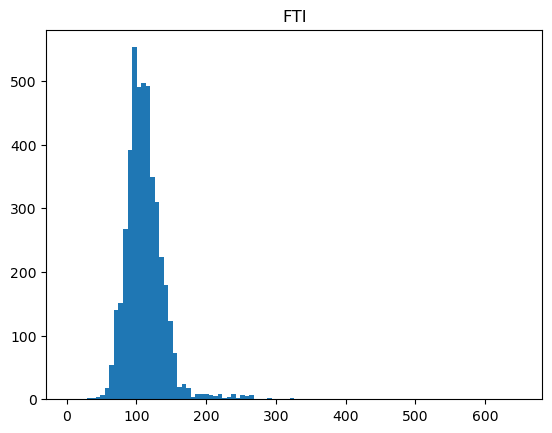

In [720]:
plt.title('FTI')
plt.hist(df['FTI'], bins=100, range=(3, 650),  align='mid')

(array([2929.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1561.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

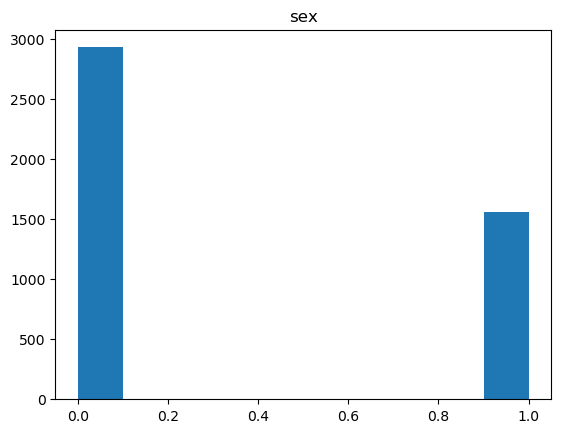

In [721]:
plt.title('sex')
plt.hist(df['sex'],  range=(0, 1),  align='mid')

In [722]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

age
70    106
60    102
55    101
72    100
59     98
     ... 
7       2
9       1
10      1
94      1
2       1
Name: count, Length: 90, dtype: int64


sex
0.0    2929
1.0    1561
Name: count, dtype: int64


on thyroxine
0    4029
1     461
Name: count, dtype: int64


query on thyroxine
0    4447
1      43
Name: count, dtype: int64


on antithyroid medication
0    4416
1      74
Name: count, dtype: int64


sick
0    4314
1     176
Name: count, dtype: int64


pregnant
0    4467
1      23
Name: count, dtype: int64


thyroid surgery
0    4428
1      62
Name: count, dtype: int64


I131 treatment
0    4401
1      89
Name: count, dtype: int64


query hypothyroid
0    4241
1     249
Name: count, dtype: int64


query hyperthyroid
0    4129
1     361
Name: count, dtype: int64


lithium
0    4430
1      60
Name: count, dtype: int64


goitre
0    4446
1      44
Name: count, dtype: int64


tumor
0    4387
1     103
Name: count, dtype: int64


psych
0    4176
1     314
Name: count, dtype: int64



In [723]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [724]:
features_list = df.columns.to_list()
features_list.remove('diagnosis')

X = df[features_list].values
y = df['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [725]:
hyper_params = {'n_estimators': [300, 500], 'min_samples_split': [3, 5]}

clf_rand = RandomForestClassifier()
clfrand = GridSearchCV(clf_rand, 
                   hyper_params, 
                   cv=10, 
                   scoring= 'accuracy', 
                   verbose=3, 
                   return_train_score=True)
clfrand.fit(X,y)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END min_samples_split=3, n_estimators=300;, score=(train=1.000, test=0.993) total time=   0.6s
[CV 2/10] END min_samples_split=3, n_estimators=300;, score=(train=1.000, test=0.993) total time=   0.6s
[CV 3/10] END min_samples_split=3, n_estimators=300;, score=(train=1.000, test=0.991) total time=   0.6s
[CV 4/10] END min_samples_split=3, n_estimators=300;, score=(train=1.000, test=0.989) total time=   0.6s
[CV 5/10] END min_samples_split=3, n_estimators=300;, score=(train=1.000, test=0.987) total time=   0.7s
[CV 6/10] END min_samples_split=3, n_estimators=300;, score=(train=1.000, test=0.993) total time=   0.7s
[CV 7/10] END min_samples_split=3, n_estimators=300;, score=(train=1.000, test=0.982) total time=   0.7s
[CV 8/10] END min_samples_split=3, n_estimators=300;, score=(train=1.000, test=0.989) total time=   0.7s
[CV 9/10] END min_samples_split=3, n_estimators=300;, score=(train=1.000, test=0.982) total time=  

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [3, 5],
                         'n_estimators': [300, 500]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [726]:
best_est_rndf = clfrand.best_estimator_

rf_pred = best_est_rndf.predict(X_test)

target_names = ['healthy', 'hyper_cond', 'hypo_cond']
res1 = classification_report(y_test, rf_pred, target_names=target_names, output_dict=True)
pd.DataFrame(res1)

,healthy,hyper_cond,hypo_cond,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,1674.0,79.0,43.0,1.0,1796.0,1796.0


In [727]:
res = []
for l in [0,1,2]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                      np.array(rf_pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
pd.DataFrame(res, index = target_names, columns = ['class','sensitivity','specificity'])

,class,sensitivity,specificity
healthy,0,1.0,1.0
hyper_cond,1,1.0,1.0
hypo_cond,2,1.0,1.0


[[1674    0    0]
 [   0   79    0]
 [   0    0   43]]


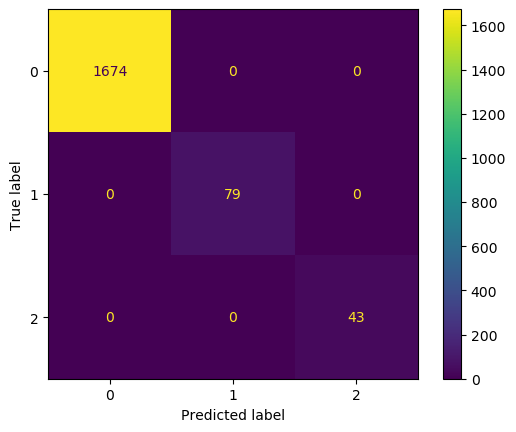

In [728]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
print(confusion_matrix(y_test,rf_pred))

In [729]:


clfrand.best_params_



{'min_samples_split': 3, 'n_estimators': 500}

In [730]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=7)

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    print('fold:',i)
    
    x_test_k = df[features_list].iloc[test_index].values
    y_test_k = df['diagnosis'].iloc[test_index].values
    
    rf_pred = best_est_rndf.predict(x_test_k)
    
    target_names = ['healthy', 'hyper_cond', 'hypo_cond']
    print(classification_report(y_test_k, rf_pred, target_names=target_names))
    
    res = []
    for l in [0,1,2]:
        prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test_k)==l,
                                                          np.array(rf_pred)==l,
                                                          pos_label=True,average=None)
        res.append([l,recall[0],recall[1]])
    pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

fold: 0
              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00       610
  hyper_cond       1.00      1.00      1.00        15
   hypo_cond       1.00      1.00      1.00        17

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642

fold: 1
              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00       613
  hyper_cond       1.00      1.00      1.00        18
   hypo_cond       1.00      1.00      1.00        11

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642

fold: 2
              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00       594
  hyper_cond       1.00      1.00      1.00        33
   hypo_cond       1.00      1.00      1.00        

Text(0, 0.5, 'Importance')

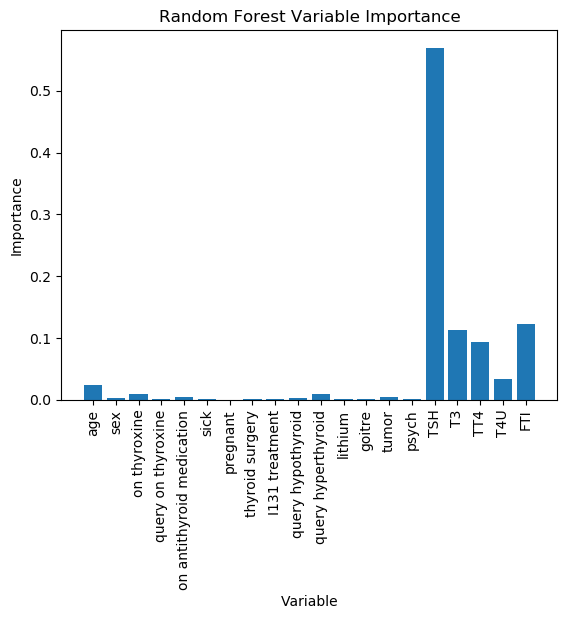

In [741]:
importance = list(best_est_rndf.feature_importances_)

feature_importance = [(features_list, round(importance,2)) for feature, importance in zip(features_list, importance)]

#Sort our features from the most important
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse= True)

# Visualize
xlabels = list(range(len(importance)))

plt.bar(xlabels, importance, orientation = 'vertical')
plt.xticks(xlabels, features_list, rotation =90)
plt.title("Random Forest Variable Importance")
plt.xlabel("Variable")
plt.ylabel("Importance")
     


In [734]:
from sklearn.ensemble import AdaBoostClassifier

hyper_params = {'n_estimators': [160, 200, 240], 'learning_rate': [0.75, 0.8, 0.85]}

ada_clf = AdaBoostClassifier()

ada_clf = GridSearchCV(ada_clf, 
                   hyper_params, 
                   cv=10, 
                   scoring= 'accuracy', 
                   verbose=3, 
                   return_train_score=True)

ada_clf.fit(X, y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END learning_rate=0.75, n_estimators=160;, score=(train=0.988, test=0.991) total time=   0.4s
[CV 2/10] END learning_rate=0.75, n_estimators=160;, score=(train=0.987, test=0.998) total time=   0.4s
[CV 3/10] END learning_rate=0.75, n_estimators=160;, score=(train=0.989, test=0.989) total time=   0.4s
[CV 4/10] END learning_rate=0.75, n_estimators=160;, score=(train=0.988, test=0.989) total time=   0.4s
[CV 5/10] END learning_rate=0.75, n_estimators=160;, score=(train=0.989, test=0.987) total time=   0.4s
[CV 6/10] END learning_rate=0.75, n_estimators=160;, score=(train=0.981, test=0.980) total time=   0.4s
[CV 7/10] END learning_rate=0.75, n_estimators=160;, score=(train=0.989, test=0.980) total time=   0.4s
[CV 8/10] END learning_rate=0.75, n_estimators=160;, score=(train=0.989, test=0.987) total time=   0.4s
[CV 9/10] END learning_rate=0.75, n_estimators=160;, score=(train=0.989, test=0.978) total time=   0.4s
[CV

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.75, 0.8, 0.85],
                         'n_estimators': [160, 200, 240]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [735]:
best_est = ada_clf.best_estimator_
ada_pred = best_est.predict(X_test)

target_names = ['healthy', 'hyper_cond', 'hypo_cond']
res1 = classification_report(y_test, ada_pred, target_names=target_names, output_dict=True)
pd.DataFrame(res1)


,healthy,hyper_cond,hypo_cond,accuracy,macro avg,weighted avg
precision,0.995178,0.963415,0.636364,0.982739,0.864985,0.985190
recall,0.986260,1.000000,0.813953,0.982739,0.933405,0.982739
f1-score,0.990699,0.981366,0.714286,0.982739,0.895450,0.983671
support,1674.000000,79.000000,43.000000,0.982739,1796.000000,1796.000000


In [736]:
res = []
for l in [0,1,2]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                      np.array(ada_pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
pd.DataFrame(res,index=target_names, columns = ['class','sensitivity','specificity'])

,class,sensitivity,specificity
healthy,0,0.934426,0.986260
hyper_cond,1,0.998253,1.000000
hypo_cond,2,0.988591,0.813953


[[1651    3   20]
 [   0   79    0]
 [   8    0   35]]


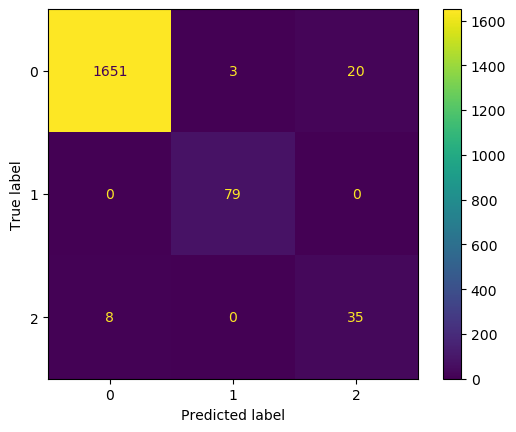

In [737]:
print(confusion_matrix(y_test,ada_pred))
ConfusionMatrixDisplay.from_predictions(y_test, ada_pred)

In [738]:
ada_clf.best_params_

{'learning_rate': 0.8, 'n_estimators': 200}

Text(0, 0.5, 'Importance')

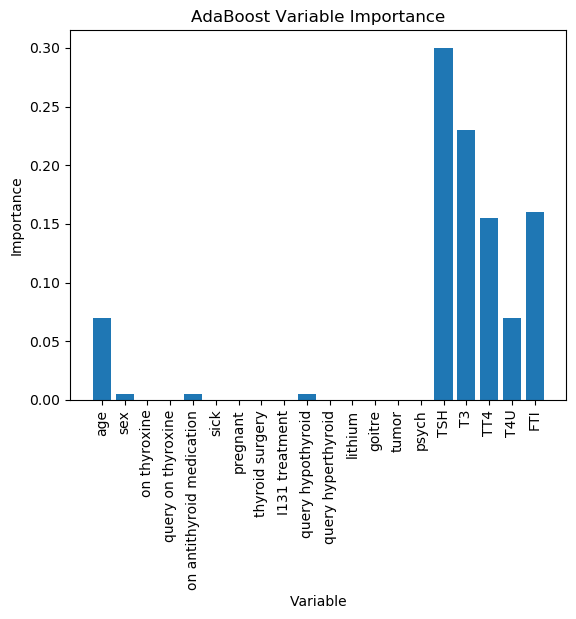

In [739]:
importance = list(best_est.feature_importances_)

feature_importance = [(features_list, round(importance,2)) for feature, importance in zip(features_list, importance)]

#Sort our features from the most important
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse= True)

# Visualize
xlabels = list(range(len(importance)))

plt.bar(xlabels, importance, orientation = 'vertical')
plt.xticks(xlabels, features_list, rotation =90)
plt.title("AdaBoost Variable Importance")
plt.xlabel("Variable")
plt.ylabel("Importance")

In [742]:
fkf = KFold(n_splits=7)

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    print('fold:',i)
    
    x_test_k = df[features_list].iloc[test_index].values
    y_test_k = df['diagnosis'].iloc[test_index].values
    
    ada_pred = best_est.predict(x_test_k)
    
    target_names = ['healthy', 'hyper_cond', 'hypo_cond']
    print(classification_report(y_test_k, ada_pred, target_names=target_names))
    
    res = []
    for l in [0,1,2]:
        prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test_k)==l,
                                                          np.array(ada_pred)==l,
                                                          pos_label=True,average=None)
        res.append([l,recall[0],recall[1]])
    pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

fold: 0
              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00       610
  hyper_cond       0.88      1.00      0.94        15
   hypo_cond       1.00      1.00      1.00        17

    accuracy                           1.00       642
   macro avg       0.96      1.00      0.98       642
weighted avg       1.00      1.00      1.00       642

fold: 1
              precision    recall  f1-score   support

     healthy       1.00      0.99      0.99       613
  hyper_cond       0.95      1.00      0.97        18
   hypo_cond       0.69      0.82      0.75        11

    accuracy                           0.99       642
   macro avg       0.88      0.94      0.91       642
weighted avg       0.99      0.99      0.99       642

fold: 2
              precision    recall  f1-score   support

     healthy       0.99      0.99      0.99       594
  hyper_cond       1.00      1.00      1.00        33
   hypo_cond       0.75      0.80      0.77        